In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    # Repeated Stratified K-Fold
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Metriken definieren
    accuracy_train = []
    accuracy_test = []
    f1 = []
    recall = []  
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        # Splitte die Daten in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das Modell
        model.fit(X_train, y_train)

        # Vorhersagen für Trainings- und Testdaten
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Berechne die Metriken
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        recall.append(recall_score(y_test, y_test_pred))  
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Durchschnittswerte berechnen
    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score": np.mean(f1),
        "Recall": np.mean(recall), 
        "ROC-AUC": np.mean(roc_auc),
    }

# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"

# Excel-Datei einlesen
try:
    # Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

    # Skalierung der Features (X) mit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Normiert X auf den Standardbereich (Mittelwert = 0, Std = 1)

    # Modelle definieren
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
        "LightGBM": LGBMClassifier(verbose=-1,random_state=42),
        "SVC": SVC(probability=True, random_state=42),
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
        "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
        "Bagging Classifier": BaggingClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(random_state=42),
    }

    # Ergebnisse speichern
    results = []

    # Validierung jedes Modells
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_scaled, y)  
        results.append({"Model": model_name, **metrics})

    # Ergebnisse in DataFrame konvertieren und sortieren
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

    # Ergebnisse anzeigen
    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Logistic Regression
Modell wird validiert: Decision Tree
Modell wird validiert: Random Forest
Modell wird validiert: Gradient Boosting
Modell wird validiert: XGBoost
Modell wird validiert: LightGBM
Modell wird validiert: SVC
Modell wird validiert: k-Nearest Neighbors
Modell wird validiert: MLP Classifier
Modell wird validiert: Gaussian Naive Bayes
Modell wird validiert: Linear Discriminant Analysis
Modell wird validiert: Quadratic Discriminant Analysis


C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Varia

Modell wird validiert: Bagging Classifier
Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
                              Model  Train Accuracy  Test Accuracy  F1-Score    Recall   ROC-AUC
0               Logistic Regression        1.000000       0.882530  0.885185  0.863462  0.970874
8                    MLP Classifier        1.000000       0.866443  0.873470  0.865641  0.951640
6                               SVC        0.978547       0.843478  0.854822  0.857436  0.938984
4                           XGBoost        1.000000       0.830040  0.834000  0.801282  0.931310
13                      Extra Trees        1.000000       0.830435  0.841607  0.840000  0.925927
3                 Gradient Boosting        1.000000       0.833755  0.841764  0.819359  0.922178
2                     Random Forest        1.000000       0.821344  0.831655  0.821538  0.918608
5                          LightGBM        1.000000       0.815889  0.820686  0.793077  0.912572
9              Gaussian N

Feature Selektion auf Basis von Feature Importance (Random Forest) und Korrelationsmatrix r < 0,7

Hochkorrelierte Features (r > 0.7):
CMJ_Jump Height flighttime und CMJ_Net Impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und CMJ_Jump Height impulse mit Korrelation: 0.71
CMJ_Jump Height flighttime und CMJ_RSI (impulse) mit Korrelation: 0.77
CMJ_Jump Height flighttime und CMJ_Rel. Peak Power mit Korrelation: 0.90
CMJ_Jump Height flighttime und INV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und CMJ_Net landing impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und INV_CMJ_uni_Peak Loading Force-Mittelwert [N] mit Korrelation: 0.70
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.86
CMJ_Jump Height flighttime und INV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Net Impulse-Mittelwert [cm] mit Korrelation: 0.82
CMJ_Jump Height flight

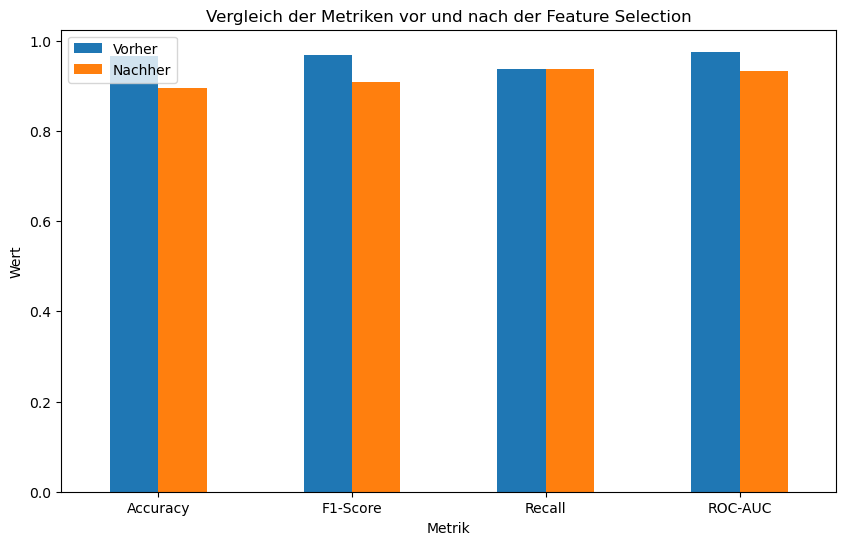

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report

# Daten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Dummy-Spalte für das Geschlecht (nicht normalisieren)
dummy_columns = ['Geschlecht_weiblich']
X_dummies = X[dummy_columns]
X_numerical = X.drop(columns=dummy_columns)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Skalierung der numerischen Features im Trainingsdatensatz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=dummy_columns))
X_test_scaled = scaler.transform(X_test.drop(columns=dummy_columns))

# Dummies wieder hinzufügen
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Bereite X_train_final und X_test_final vor
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Stellt sicher, dass X_train_final, X_test_final und y_train NumPy-Arrays sind
X_train_final = np.array(X_train_final)  # Für die Cross-Validation
X_test_final = np.array(X_test_final)   # Für spätere Validierung
y_train = np.array(y_train)             # Für die Cross-Validation

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Repeated Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    y = np.array(y)  # Konvertiere y in ein NumPy-Array
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        feature_importances += model.feature_importances_
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_train_final, y_train, rf, cv)

# Erstelle DataFrame mit Feature-Importances
feature_importance_df = pd.DataFrame({
    'Feature': list(X_numerical.columns) + dummy_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Korrelationsmatrix berechnen
correlation_matrix = X_numerical.corr()

# Identifiziere hochkorrelierte Features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Hochkorrelierte Features filtern
features_to_drop = set()
for feature1, feature2, corr_value in high_corr_pairs:
    # Bestimme das Feature mit der geringeren Importance
    importance1 = feature_importance_df.loc[feature_importance_df['Feature'] == feature1, 'Importance'].values[0]
    importance2 = feature_importance_df.loc[feature_importance_df['Feature'] == feature2, 'Importance'].values[0]
    
    if importance1 < importance2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Print hochkorrelierte Paare und deren Korrelation
print("Hochkorrelierte Features (r > 0.7):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} und {feature2} mit Korrelation: {corr_value:.2f}")

# Entferne identifizierte Features aus dem gesamten Datensatz
df_reduced = df.drop(columns=features_to_drop)

# Speichere den gesamten reduzierten Datensatz
output_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_korr_70_feature_importance.xlsx"
df_reduced.to_excel(output_path, index=False)
print(f"Der gesamte reduzierte Datensatz wurde unter folgendem Pfad gespeichert: {output_path}")

# Funktion zur Validierung der Feature Selection
def validate_feature_selection(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train)
    
    train_metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
    }
    test_metrics = {
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob_test)
    }
    return train_metrics, test_metrics

# Validierung vor der Feature Selection
train_metrics_original, test_metrics_original = validate_feature_selection(
    rf, 
    X_train_final, 
    y_train, 
    X_test_final, 
    y_test
)

# Reduziertes Training und Test-Set erstellen (nur reduzierte Features verwenden)
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Skalierung der reduzierten numerischen Features
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced.drop(columns=dummy_columns))
X_test_reduced_scaled = scaler.transform(X_test_reduced.drop(columns=dummy_columns))
X_train_reduced_final = np.concatenate([X_train_reduced_scaled, X_train_reduced[dummy_columns].values], axis=1)
X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test_reduced[dummy_columns].values], axis=1)

# Validierung nach der Feature Selection
train_metrics_reduced, test_metrics_reduced = validate_feature_selection(
    rf, 
    X_train_reduced_final, 
    y_train, 
    X_test_reduced_final, 
    y_test
)

# Vergleich der Metriken
print("\nVergleich der Metriken vor und nach der Feature Selection:")
metrics_comparison = pd.DataFrame({
    "Metrik": ["Accuracy", "F1-Score", "Recall", "ROC-AUC"],
    "Vorher": [
        test_metrics_original["Test Accuracy"], 
        test_metrics_original["F1-Score"], 
        test_metrics_original["Recall"], 
        test_metrics_original["ROC-AUC"]
    ],
    "Nachher": [
        test_metrics_reduced["Test Accuracy"], 
        test_metrics_reduced["F1-Score"], 
        test_metrics_reduced["Recall"], 
        test_metrics_reduced["ROC-AUC"]
    ]
})
print(metrics_comparison)

# Visualisierung des Vergleichs
metrics_comparison.set_index("Metrik").plot(kind="bar", figsize=(10, 6), rot=0, title="Vergleich der Metriken vor und nach der Feature Selection")
plt.ylabel("Wert")
plt.show()


Feature Selektion auf Basis von Feature Importance (Random Forest) und Korrelationsmatrix r < 0,8 

Hochkorrelierte Features (r > 0.8):
CMJ_Jump Height flighttime und CMJ_Net Impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und CMJ_Rel. Peak Power mit Korrelation: 0.90
CMJ_Jump Height flighttime und INV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und CMJ_Net landing impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.86
CMJ_Jump Height flighttime und INV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Net Impulse-Mittelwert [cm] mit Korrelation: 0.82
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Jump Height by Net

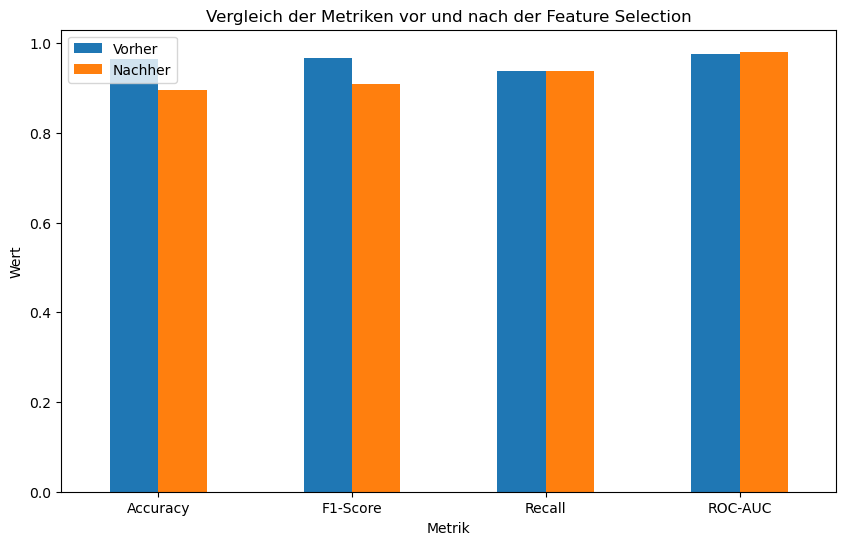

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report

# Daten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Dummy-Spalte für das Geschlecht (nicht normalisieren)
dummy_columns = ['Geschlecht_weiblich']
X_dummies = X[dummy_columns]
X_numerical = X.drop(columns=dummy_columns)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Skalierung der numerischen Features im Trainingsdatensatz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=dummy_columns))
X_test_scaled = scaler.transform(X_test.drop(columns=dummy_columns))

# Dummies wieder hinzufügen
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Bereite X_train_final und X_test_final vor
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Stellt sicher, dass X_train_final, X_test_final und y_train NumPy-Arrays sind
X_train_final = np.array(X_train_final)  # Für die Cross-Validation
X_test_final = np.array(X_test_final)   # Für spätere Validierung
y_train = np.array(y_train)             # Für die Cross-Validation

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Repeated Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    y = np.array(y)  # Konvertiere y in ein NumPy-Array
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        feature_importances += model.feature_importances_
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_train_final, y_train, rf, cv)

# Erstelle DataFrame mit Feature-Importances
feature_importance_df = pd.DataFrame({
    'Feature': list(X_numerical.columns) + dummy_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Korrelationsmatrix berechnen
correlation_matrix = X_numerical.corr()

# Identifiziere hochkorrelierte Features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Hochkorrelierte Features filtern
features_to_drop = set()
for feature1, feature2, corr_value in high_corr_pairs:
    # Bestimme das Feature mit der geringeren Importance
    importance1 = feature_importance_df.loc[feature_importance_df['Feature'] == feature1, 'Importance'].values[0]
    importance2 = feature_importance_df.loc[feature_importance_df['Feature'] == feature2, 'Importance'].values[0]
    
    if importance1 < importance2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Print hochkorrelierte Paare und deren Korrelation
print("Hochkorrelierte Features (r > 0.8):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} und {feature2} mit Korrelation: {corr_value:.2f}")

# Entferne identifizierte Features aus dem gesamten Datensatz
df_reduced = df.drop(columns=features_to_drop)

# Speichere den gesamten reduzierten Datensatz
output_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_korr_80_feature_importance.xlsx"
df_reduced.to_excel(output_path, index=False)
print(f"Der gesamte reduzierte Datensatz wurde unter folgendem Pfad gespeichert: {output_path}")

# Funktion zur Validierung der Feature Selection
def validate_feature_selection(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train)
    
    train_metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
    }
    test_metrics = {
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob_test)
    }
    return train_metrics, test_metrics

# Validierung vor der Feature Selection
train_metrics_original, test_metrics_original = validate_feature_selection(
    rf, 
    X_train_final, 
    y_train, 
    X_test_final, 
    y_test
)

# Reduziertes Training und Test-Set erstellen (nur reduzierte Features verwenden)
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Skalierung der reduzierten numerischen Features
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced.drop(columns=dummy_columns))
X_test_reduced_scaled = scaler.transform(X_test_reduced.drop(columns=dummy_columns))
X_train_reduced_final = np.concatenate([X_train_reduced_scaled, X_train_reduced[dummy_columns].values], axis=1)
X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test_reduced[dummy_columns].values], axis=1)

# Validierung nach der Feature Selection
train_metrics_reduced, test_metrics_reduced = validate_feature_selection(
    rf, 
    X_train_reduced_final, 
    y_train, 
    X_test_reduced_final, 
    y_test
)

# Vergleich der Metriken
print("\nVergleich der Metriken vor und nach der Feature Selection:")
metrics_comparison = pd.DataFrame({
    "Metrik": ["Test-Accuracy", "F1-Score", "Recall", "ROC-AUC"],
    "Vorher": [
        test_metrics_original["Test Accuracy"], 
        test_metrics_original["F1-Score"], 
        test_metrics_original["Recall"], 
        test_metrics_original["ROC-AUC"]
    ],
    "Nachher": [
        test_metrics_reduced["Test Accuracy"], 
        test_metrics_reduced["F1-Score"], 
        test_metrics_reduced["Recall"], 
        test_metrics_reduced["ROC-AUC"]
    ]
})
print(metrics_comparison)

# Visualisierung des Vergleichs
metrics_comparison.set_index("Metrik").plot(kind="bar", figsize=(10, 6), rot=0, title="Vergleich der Metriken vor und nach der Feature Selection")
plt.ylabel("Wert")
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

# 1. Datenaufbereitung und Train-Test-Split
def prepare_data(data, target, test_size=0.2, random_state=42):
    X = data.drop(columns=[target])
    y = data[target]
    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

# 2. Normalisierung
def normalize_data(X_train, X_test, dummy_col):
    # Dummy-Variable trennen
    dummy_train = X_train[dummy_col]
    dummy_test = X_test[dummy_col]
    X_train = X_train.drop(columns=[dummy_col])
    X_test = X_test.drop(columns=[dummy_col])
    
    # Normalisieren der metrischen Variablen
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Dummy wieder hinzufügen
    X_train_scaled = np.hstack([X_train_scaled, dummy_train.values.reshape(-1, 1)])
    X_test_scaled = np.hstack([X_test_scaled, dummy_test.values.reshape(-1, 1)])
    return X_train_scaled, X_test_scaled, X_train.columns.tolist() + [dummy_col]

# 3. Feature Importance & Cross-Validation
def compute_feature_importance(X, y, n_splits=5, n_repeats=10, random_state=42):
    model = LogisticRegression(max_iter=1000, random_state=random_state)
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
    
    # Cross-Validation Metriken
    accuracies = cross_val_score(model, X, y, cv=rkf, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=rkf, scoring='f1')
    recall_scores = cross_val_score(model, X, y, cv=rkf, scoring='recall')
    roc_auc_scores = cross_val_score(model, X, y, cv=rkf, scoring='roc_auc')
    
    model.fit(X, y)
    feature_importance = np.abs(model.coef_).flatten()
    
    return {
        "feature_importance": feature_importance,
        "metrics": {
            "accuracy": np.mean(accuracies),
            "f1": np.mean(f1_scores),
            "recall": np.mean(recall_scores),
            "roc_auc": np.mean(roc_auc_scores)
        }
    }

# 4. Korrelation & Feature-Dropping
def drop_correlated_features(X, feature_importance, column_names, threshold=0.7):
    corr_matrix = pd.DataFrame(X).corr().abs()
    to_drop = set()
    correlated_pairs = []  # Liste, um korrelierte Paare zu speichern
    
    for i in range(corr_matrix.shape[0]):
        for j in range(i + 1, corr_matrix.shape[1]):
            if corr_matrix.iloc[i, j] > threshold:
                correlated_pairs.append((column_names[i], column_names[j], corr_matrix.iloc[i, j]))
                # Drop Feature mit geringerer Importance
                if feature_importance[i] < feature_importance[j]:
                    to_drop.add(i)
                else:
                    to_drop.add(j)
    
    # Behaltene Features
    retained_features = [col for idx, col in enumerate(column_names) if idx not in to_drop]
    X_reduced = np.delete(X, list(to_drop), axis=1)
    return X_reduced, to_drop, retained_features

# 5. Finales Modelltraining und Vergleich
def train_and_compare_models(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    metrics = {
        "train_accuracy": accuracy_score(y_train, y_pred_train),
        "test_accuracy": accuracy_score(y_test, y_pred_test),
        "test_f1": f1_score(y_test, y_pred_test),
        "test_recall": recall_score(y_test, y_pred_test),
        "test_roc_auc": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
    }
    return metrics

# 6. Main-Funktion
def main(file_path, target, dummy_col):
    # Daten einlesen
    try:
        data = pd.read_excel(file_path)  # Excel-Datei einlesen
        print("Daten erfolgreich geladen.")
    except Exception as e:
        print(f"Fehler beim Laden der Datei: {e}")
        return

    # Schritte ausführen
    X_train, X_test, y_train, y_test = prepare_data(data, target)
    X_train_scaled, X_test_scaled, column_names = normalize_data(X_train, X_test, dummy_col)

    # Feature Importance berechnen
    results = compute_feature_importance(X_train_scaled, y_train)
    feature_importance = results["feature_importance"]
    print("Feature Importance berechnet.")
    print("Modellmetriken (Trainingsdaten) aus Cross-Validation:")
    print(results["metrics"])

    # Hochkorrelierte Features droppen
    X_train_reduced, dropped_features, retained_features = drop_correlated_features(
        X_train_scaled, feature_importance, column_names
    )
    
    print("\nBehaltene Features nach Feature Selection:")
    print(retained_features)
    print(f"\nAnzahl der gedroppten Features: {len(dropped_features)}")

    # Finale Modelle vergleichen
    metrics_all = train_and_compare_models(X_train_scaled, X_test_scaled, y_train, y_test)
    X_test_reduced = X_test_scaled[:, [i for i in range(X_test_scaled.shape[1]) if i not in dropped_features]]
    metrics_reduced = train_and_compare_models(X_train_reduced, X_test_reduced, y_train, y_test)
    
    # Vergleichstabelle
    comparison_df = pd.DataFrame({
        "Metrik": ["Train Accuracy", "Test Accuracy", "F1-Score", "Recall", "ROC-AUC"],
        "Vorher": [
            metrics_all["train_accuracy"],
            metrics_all["test_accuracy"],
            metrics_all["test_f1"],
            metrics_all["test_recall"],
            metrics_all["test_roc_auc"],
        ],
        "Nachher": [
            metrics_reduced["train_accuracy"],
            metrics_reduced["test_accuracy"],
            metrics_reduced["test_f1"],
            metrics_reduced["test_recall"],
            metrics_reduced["test_roc_auc"],
        ],
    })

    print("\nVergleich der Metriken vor und nach der Feature Selection anhand der Testdaten:")
    print(comparison_df)

# Aufruf der Main-Funktion
if __name__ == "__main__":
    main(
        file_path=r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx",  # Dateipfad zur Excel-Datei
        target="Verletzungsstatus",  # Zielvariable
        dummy_col="Geschlecht_weiblich"  # Dummy-Spalte
    )


Daten erfolgreich geladen.
Feature Importance berechnet. Modellmetriken (Trainingsdaten):
{'accuracy': 0.8814814814814815, 'f1': 0.8831857421331105, 'recall': 0.8592592592592594, 'roc_auc': 0.9625411522633747}

Behaltene Features nach Feature Selection:
['CMJ_maxRFD', 'CMJ_KAI ecc', 'CMJ_Vertical Stiffness', 'INV_CMJ_uni_Av. braking force ', 'UNINV_CMJ_uni_Av. propulsive force ', 'CMJ_Propulsive duration', 'CMJ_TTS', 'CMJ_Landing KAI ecc', 'CMJ_Landing KAI con', 'INV_CMJ_uni_Peak Loading Force-Mittelwert [N]', 'INV_CMJ_uni_Vertical Take-Off Velocity by Net Impulse-Mittelwert [m/s]', 'INV_CMJ_uni_Max Rate of Force Development-Mittelwert [N/s]', 'INV_CMJ_uni_Vertical Stiffness-Mittelwert [kN/m]', 'INV_CMJ_uni_Countermovement Time-Mittelwert [s]', 'INV_CMJ_uni_Peak Braking Force-Mittelwert [N]', 'INV_CMJ_uni_Propulsive Impulse-Mittelwert [N*s]', 'INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW]', 'INV_CMJ_uni_Time to Stabilization-Mittelwert [s]', 'UNINV_CMJ_uni_Relative Peak Loadi

Weiter verbessern!! Cross-Validation auch für feature importance! integration der feature importance in den cross-validation prozess z.b. mit lasso, elasticnet, recursive feature elimination 

In [3]:
!git add FS_70_feature_importance.ipynb

In [5]:
!git commit -m "Feature Selektion Step 1"

[master 99ce827] Feature Selektion Step 1
 1 file changed, 246 insertions(+), 596 deletions(-)


In [7]:
!git push origin master

To https://github.com/michi1308/ML_jupyter_notebook.git
   300019f..99ce827  master -> master


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline

# 1️⃣ Datenaufbereitung
def prepare_data(data, target, test_size=0.2, random_state=42):
    X = data.drop(columns=[target])
    y = data[target]
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

# 2️⃣ Normalisierung (Dummy-Variable bleibt unberührt)
def normalize_data(X_train, X_test, dummy_col):
    # Dummy-Variable extrahieren
    dummy_train = X_train[dummy_col].values.reshape(-1, 1)
    dummy_test = X_test[dummy_col].values.reshape(-1, 1)
    
    # Entferne Dummy-Spalte für Skalierung
    X_train = X_train.drop(columns=[dummy_col])
    X_test = X_test.drop(columns=[dummy_col])

    # Standardisierung der metrischen Variablen
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Dummy-Spalte wieder hinzufügen
    X_train_final = np.hstack([X_train_scaled, dummy_train])
    X_test_final = np.hstack([X_test_scaled, dummy_test])
    
    return X_train_final, X_test_final, list(X_train.columns) + [dummy_col]

# 3️⃣ Feature Selektion & Hyperparameter Tuning mit innerer CV
def feature_selection_hyperparam_tuning(X, y, column_names, n_features_list=[5, 10, 15], n_splits=5, n_repeats=5, random_state=42):
    outer_cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
    model = LogisticRegression(max_iter=1000, random_state=random_state)
    
    param_grid = {
        "rfe__n_features_to_select": n_features_list,
        "logisticregression__C": [0.01, 0.1, 1, 10, 100],  # Regularisierungshyperparameter
    }
    
    pipeline = Pipeline([
        ("rfe", RFE(model)),
        ("logisticregression", model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=n_splits, scoring="accuracy", n_jobs=-1)
    scores = cross_val_score(grid_search, X, y, cv=outer_cv, scoring="accuracy")
    
    grid_search.fit(X, y)
    best_features_mask = grid_search.best_estimator_.named_steps["rfe"].support_
    best_features = [column_names[i] for i in range(len(column_names)) if best_features_mask[i]]
    
    return {
        "best_features_mask": best_features_mask,
        "best_features": best_features,
        "best_params": grid_search.best_params_,
        "mean_accuracy": scores.mean(),
    }

# 4️⃣ Trainiere Modell & Vergleiche Metriken
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    return {
        "train_accuracy": accuracy_score(y_train, y_pred_train),
        "test_accuracy": accuracy_score(y_test, y_pred_test),
        "f1": f1_score(y_test, y_pred_test),
        "recall": recall_score(y_test, y_pred_test),
        "roc_auc": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
    }

# 5️⃣ Hauptfunktion mit Vergleich vor/nach Feature Selection
def main(file_path, target, dummy_col):
    data = pd.read_excel(file_path)
    
    X_train, X_test, y_train, y_test = prepare_data(data, target)
    X_train_scaled, X_test_scaled, column_names = normalize_data(X_train, X_test, dummy_col)
    
    print("\n Feature Selektion & Hyperparameter-Tuning läuft...")
    results = feature_selection_hyperparam_tuning(X_train_scaled, y_train, column_names)
    selected_features_mask = results["best_features_mask"]
    
    print("\n Beste Features:", results["best_features"])
    print("Beste Hyperparameter:", results["best_params"])
    
    # Metriken mit allen Features
    metrics_all = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # Metriken mit reduzierten Features
    X_train_reduced = X_train_scaled[:, selected_features_mask]
    X_test_reduced = X_test_scaled[:, selected_features_mask]
    metrics_reduced = train_and_evaluate(X_train_reduced, X_test_reduced, y_train, y_test)
    
    comparison_df = pd.DataFrame({
        "Metrik": ["Train Accuracy", "Test Accuracy", "F1-Score", "Recall", "ROC-AUC"],
        "Vorher": [metrics_all["train_accuracy"], metrics_all["test_accuracy"], metrics_all["f1"], metrics_all["recall"], metrics_all["roc_auc"]],
        "Nachher": [metrics_reduced["train_accuracy"], metrics_reduced["test_accuracy"], metrics_reduced["f1"], metrics_reduced["recall"], metrics_reduced["roc_auc"]],
    })
    
    print("\n Vergleich der Modellmetriken vor & nach Feature Selection:")
    print(comparison_df)

# 🏁 Ausführung der Main-Funktion
if __name__ == "__main__":
    main(file_path=r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx",
         target="Verletzungsstatus",
         dummy_col="Geschlecht_weiblich")



🔍 Feature Selektion & Hyperparameter-Tuning läuft...

🎯 Beste Features: ['CMJ_maxRFD', 'CMJ_Vertical Stiffness', 'INV_CMJ_uni_Av. braking force ', 'UNINV_CMJ_uni_Av. propulsive force ', 'UNINV_CMJ_uni_Rel. Peak landing force ', 'INV_CMJ_uni_Vertical Take-Off Velocity by Net Impulse-Mittelwert [m/s]', 'INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Relative Peak Loading Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Max Rate of Force Development-Mittelwert [N/s]', 'UNINV_CMJ_uni_Braking Duration-Mittelwert [s]', 'ISO_Drehmoment_Seitenunterschied Extension absolut', 'ISO_Drehmoment_Seitenunterschied Extension relativ', 'INV_Arbeit_Extension', 'INV_Arbeit_Flexion', 'ISO_Arbeit_Seitenunterschied Extension relativ']
Beste Hyperparameter: {'logisticregression__C': 100, 'rfe__n_features_to_select': 15}

📊 Vergleich der Modellmetriken vor & nach Feature Selection:
           Metrik    Vorher   Nachher
0  Train Accuracy  1.000000  1.000000
1   Test Accuracy  0.913043  0.91304

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline

# 1️⃣ Datenaufbereitung
def prepare_data(data, target, test_size=0.2, random_state=42):
    X = data.drop(columns=[target])
    y = data[target]
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

# 2️⃣ Normalisierung (Dummy-Variable bleibt unberührt)
def normalize_data(X_train, X_test, dummy_col):
    # Dummy-Variable extrahieren
    dummy_train = X_train[dummy_col].values.reshape(-1, 1)
    dummy_test = X_test[dummy_col].values.reshape(-1, 1)
    
    # Entferne Dummy-Spalte für Skalierung
    X_train = X_train.drop(columns=[dummy_col])
    X_test = X_test.drop(columns=[dummy_col])

    # Standardisierung der metrischen Variablen
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Dummy-Spalte wieder hinzufügen
    X_train_final = np.hstack([X_train_scaled, dummy_train])
    X_test_final = np.hstack([X_test_scaled, dummy_test])
    
    return X_train_final, X_test_final, list(X_train.columns) + [dummy_col]

# 3️⃣ Feature Selektion & Hyperparameter Tuning mit innerer CV
def feature_selection_hyperparam_tuning(X, y, column_names, n_features_list=[5, 10, 15], n_splits=5, n_repeats=5, random_state=42):
    outer_cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
    model = LogisticRegression(max_iter=1000, random_state=random_state)
    
    param_grid = {
        "rfe__n_features_to_select": n_features_list,
        "logisticregression__C": [0.01, 0.1, 1, 10, 100],  # Regularisierungshyperparameter
    }
    
    pipeline = Pipeline([
        ("rfe", RFE(model)),
        ("logisticregression", model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=n_splits, scoring="accuracy", n_jobs=-1)
    scores = cross_val_score(grid_search, X, y, cv=outer_cv, scoring="accuracy")
    
    grid_search.fit(X, y)
    best_features_mask = grid_search.best_estimator_.named_steps["rfe"].support_
    best_features = [column_names[i] for i in range(len(column_names)) if best_features_mask[i]]
    
    return {
        "best_features_mask": best_features_mask,
        "best_features": best_features,
        "best_params": grid_search.best_params_,
        "mean_accuracy": scores.mean(),
    }

def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Wahrscheinlichkeiten für beide Klassen holen
    y_probs = model.predict_proba(X_test)  # shape (n_samples, 2)
    
    overall_metrics = {
        "train_accuracy": accuracy_score(y_train, y_pred_train),
        "test_accuracy": accuracy_score(y_test, y_pred_test),
        "f1": f1_score(y_test, y_pred_test),
        "recall": recall_score(y_test, y_pred_test),
        "roc_auc": roc_auc_score(y_test, y_probs[:, 1]),  # Standard ROC-AUC für Klasse 1
    }

    classwise_metrics = {
        "f1_per_class": f1_score(y_test, y_pred_test, average=None),
        "recall_per_class": recall_score(y_test, y_pred_test, average=None),
        "roc_auc_per_class": [
            roc_auc_score(y_test == 0, y_probs[:, 0]),  # ROC-AUC für Klasse 0
            roc_auc_score(y_test == 1, y_probs[:, 1])   # ROC-AUC für Klasse 1
        ],
    }

    return {
        "overall": overall_metrics,
        "classwise": classwise_metrics
    }



# 🏁 Hauptfunktion mit Vergleich vor/nach Feature Selection und getrennten Metriken für 0/1
def main(file_path, target, dummy_col):
    data = pd.read_excel(file_path)
    
    X_train, X_test, y_train, y_test = prepare_data(data, target)
    X_train_scaled, X_test_scaled, column_names = normalize_data(X_train, X_test, dummy_col)
    
    print("\n Feature Selektion & Hyperparameter-Tuning läuft...")
    results = feature_selection_hyperparam_tuning(X_train_scaled, y_train, column_names)
    selected_features_mask = results["best_features_mask"]
    
    print("\n Beste Features:", results["best_features"])
    print("Beste Hyperparameter:", results["best_params"])
    
    # Metriken mit allen Features
    metrics_all = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # Metriken mit reduzierten Features
    X_train_reduced = X_train_scaled[:, selected_features_mask]
    X_test_reduced = X_test_scaled[:, selected_features_mask]
    metrics_reduced = train_and_evaluate(X_train_reduced, X_test_reduced, y_train, y_test)
    
    # Vergleich Gesamtmetriken
    comparison_df = pd.DataFrame({
        "Metrik": ["Train Accuracy", "Test Accuracy", "F1-Score (gesamt)", "Recall (gesamt)", "ROC-AUC (gesamt)"],
        "Vorher": [
            metrics_all["overall"]["train_accuracy"], 
            metrics_all["overall"]["test_accuracy"], 
            metrics_all["overall"]["f1"], 
            metrics_all["overall"]["recall"], 
            metrics_all["overall"]["roc_auc"]
        ],
        "Nachher": [
            metrics_reduced["overall"]["train_accuracy"], 
            metrics_reduced["overall"]["test_accuracy"], 
            metrics_reduced["overall"]["f1"], 
            metrics_reduced["overall"]["recall"], 
            metrics_reduced["overall"]["roc_auc"]
        ],
    })
    
    # Vergleich Metriken für Klasse 0 & 1
    comparison_df_per_class = pd.DataFrame({
        "Metrik": [
            "F1-Score Klasse 0", "F1-Score Klasse 1", 
            "Recall Klasse 0", "Recall Klasse 1", 
            "ROC-AUC Klasse 0", "ROC-AUC Klasse 1"
        ],
        "Vorher": metrics_all["classwise"]["f1_per_class"].tolist() + 
                  metrics_all["classwise"]["recall_per_class"].tolist() + 
                  metrics_all["classwise"]["roc_auc_per_class"].tolist(),
        "Nachher": metrics_reduced["classwise"]["f1_per_class"].tolist() + 
                   metrics_reduced["classwise"]["recall_per_class"].tolist() + 
                   metrics_reduced["classwise"]["roc_auc_per_class"].tolist(),
    })

    print("\n Vergleich der Modellmetriken vor & nach Feature Selection:")
    print(comparison_df)

    print("\n Vergleich der Modellmetriken pro Klasse:")
    print(comparison_df_per_class)


# 🏁 Ausführung der Main-Funktion
if __name__ == "__main__":
    main(file_path=r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx",
         target="Verletzungsstatus",
         dummy_col="Geschlecht_weiblich")



 Feature Selektion & Hyperparameter-Tuning läuft...

 Beste Features: ['CMJ_maxRFD', 'CMJ_Vertical Stiffness', 'INV_CMJ_uni_Av. braking force ', 'UNINV_CMJ_uni_Av. propulsive force ', 'UNINV_CMJ_uni_Rel. Peak landing force ', 'INV_CMJ_uni_Vertical Take-Off Velocity by Net Impulse-Mittelwert [m/s]', 'INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Relative Peak Loading Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Max Rate of Force Development-Mittelwert [N/s]', 'UNINV_CMJ_uni_Braking Duration-Mittelwert [s]', 'ISO_Drehmoment_Seitenunterschied Extension absolut', 'ISO_Drehmoment_Seitenunterschied Extension relativ', 'INV_Arbeit_Extension', 'INV_Arbeit_Flexion', 'ISO_Arbeit_Seitenunterschied Extension relativ']
Beste Hyperparameter: {'logisticregression__C': 100, 'rfe__n_features_to_select': 15}


AttributeError: 'list' object has no attribute 'tolist'

In [ ]:
innerer und äußere cv, zwei separate skripte und einen dritten zum direkten vergleich der metriken
repeated stratified cv verwenden 

In [7]:
!git add FS_70_feature_importance.ipynb
!git commit -m "feature selection und hyperparameter mit gruppen 0 und 1"
!git push origin master

In [11]:
!git commit -m "feature selection und hyperparameter"

[master ef32259] feature selection und hyperparameter
 1 file changed, 176 insertions(+), 29 deletions(-)


In [13]:
!git push origin master

To https://github.com/michi1308/ML_jupyter_notebook.git
   99ce827..ef32259  master -> master


In [ ]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from collections import defaultdict

# Daten laden
def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    # Dummy-Variable separat speichern
    dummy_var = X["Geschlecht_weiblich"]

    # Alle anderen Features normalisieren
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

    # Dummy-Variable wieder hinzufügen
    X_scaled["Geschlecht_weiblich"] = dummy_var  

    return X_scaled


# Hyperparameter-Optimierung mit Optuna
def optimize_hyperparameters(X, y):
    def objective(trial):
        C = trial.suggest_loguniform("C", 0.0001, 10.0)
        penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
        solver = "liblinear" if penalty == "l1" else "lbfgs"

        model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=500)
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
        return np.mean(scores)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)
    return study.best_params

# Feature-Selektion mit RFE
def select_features(X, y, best_params):
    model = LogisticRegression(**best_params, max_iter=500)
    selector = RFE(model, n_features_to_select=len(X.columns))  # Start mit allen Features
    selector.fit(X, y)
    
    # Beste Anzahl an Features optimieren
    best_n = len(X.columns)
    best_score = 0
    for n in range(1, len(X.columns) + 1):
        selector.n_features_to_select = n
        selector.fit(X, y)
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc"))
        if score > best_score:
            best_score = score
            best_n = n

    # Finales Modell mit optimierter Anzahl an Features
    selector.n_features_to_select = best_n
    selector.fit(X, y)
    return X.iloc[:, selector.support_]


# Äußere Cross-Validation mit Metriken & Confusion Matrix
def nested_cross_validation(X, y, best_params):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    
    metrics = defaultdict(list)
    confusion_matrices = []
    confusion_matrices_0 = []
    confusion_matrices_1 = []
    
    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Berechnung der Metriken
        metrics["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["recall"].append(recall_score(y_test, y_pred))
        metrics["f1"].append(f1_score(y_test, y_pred))
        metrics["roc_auc"].append(roc_auc_score(y_test, y_prob))

        # Confusion Matrix für Gesamtpopulation
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

        # Confusion Matrix für Gruppe 0 (Unverletzte) und Gruppe 1 (Verletzte)
        cm_0 = confusion_matrix(y_test[y_test == 0], y_pred[y_test == 0])
        cm_1 = confusion_matrix(y_test[y_test == 1], y_pred[y_test == 1])

        confusion_matrices_0.append(cm_0 if cm_0.shape == (2, 2) else np.zeros((2, 2)))
        confusion_matrices_1.append(cm_1 if cm_1.shape == (2, 2) else np.zeros((2, 2)))

    # Durchschnittliche Metriken berechnen
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}

    # Durchschnittliche Confusion Matrices berechnen
    avg_cm = np.mean(confusion_matrices, axis=0)
    avg_cm_0 = np.mean(confusion_matrices_0, axis=0)
    avg_cm_1 = np.mean(confusion_matrices_1, axis=0)

    return avg_metrics, avg_cm, avg_cm_0, avg_cm_1

# Main-Funktion zum Steuern des Ablaufs
def main():
    file_path = r"C:\\Users\\michi\\Documents\\Basistabelle_alle_PostOP_ML.xlsx"
    X, y = load_data(file_path)
    X = preprocess_data(X)

    print("Optimierung der Hyperparameter...")
    best_params = optimize_hyperparameters(X, y)
    print(f"Beste Hyperparameter: {best_params}")

    print("Feature-Selektion...")
    X_selected = select_features(X, y, best_params)
    print(f"Verwendete Features: {list(X_selected.columns)}")

    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm, avg_cm_0, avg_cm_1 = nested_cross_validation(X_selected, y, best_params)

    print("\n--- Endgültige Ergebnisse ---")
    for metric, (mean, std) in avg_metrics.items():
        print(f"{metric}: {mean:.4f} ± {std:.4f}")

    print("\nDurchschnittliche Confusion Matrix (Gesamtpopulation):")
    print(avg_cm)

    print("\nDurchschnittliche Confusion Matrix (Gruppe 0 - Unverletzte):")
    print(avg_cm_0)

    print("\nDurchschnittliche Confusion Matrix (Gruppe 1 - Verletzte):")
    print(avg_cm_1)

if __name__ == "__main__":
    main()

Optimierung der Hyperparameter...
Beste Hyperparameter: {'C': 0.3641260252753345, 'penalty': 'l2'}
Feature-Selektion...
Verwendete Features: ['INV_CMJ_uni_Rel. peak loading force ', 'CMJ_maxRFD', 'UNINV_CMJ_uni_Rel. Peak Power ', 'CMJ_KAI ecc', 'CMJ_Vertical Stiffness', 'INV_CMJ_uni_Peak braking force ', 'INV_CMJ_uni_Av. braking force ', 'UNINV_CMJ_uni_Av. propulsive force ', 'UNINV_CMJ_uni_Rel. Peak landing force ', 'CMJ_Landing KAI ecc', 'INV_CMJ_uni_Peak Loading Force-Mittelwert [N]', 'INV_CMJ_uni_Vertical Take-Off Velocity by Net Impulse-Mittelwert [m/s]', 'INV_CMJ_uni_Relative Peak Power-Mittelwert [Watt/kg]', 'INV_CMJ_uni_Braking Duration-Mittelwert [s]', 'INV_CMJ_uni_Durchschnittliche Bremsgeschwindigkeit-Mittelwert [m/s]', 'INV_CMJ_uni_Propulsive Impulse-Mittelwert [N*s]', 'INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Peak Loading Force-Mittelwert [N]', 'UNINV_CMJ_uni_Relative Peak Loading Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Max Rate of Force Deve

,Gruppe,Train Accuracy,Test Accuracy,F1 Score,Recall,ROC-AUC
0,0 (Unverletzte),100.00 ± 0.00,96.18 ± 6.57,94.74 ± 4.34,96.18 ± 6.57,95.16 ± 3.98
1,1 (Verletzte),99.51 ± 0.87,94.13 ± 6.78,95.31 ± 3.87,94.13 ± 6.78,99.51 ± 0.78


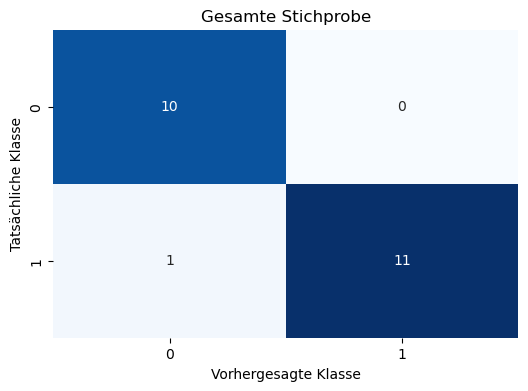

In [31]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from collections import defaultdict
from IPython.display import display, HTML
optuna.logging.set_verbosity(optuna.logging.WARNING)


def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    dummy_var = X["Geschlecht_weiblich"]
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    X_scaled["Geschlecht_weiblich"] = dummy_var  
    return X_scaled

def optimize_hyperparameters(X, y):
    def objective(trial):
        C = trial.suggest_float("C", 0.0001, 10.0, log=True)
        penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
        solver = "liblinear" if penalty == "l1" else "lbfgs"

        model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=500)
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
        return np.mean(scores)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)
    return study.best_params

def select_features(X, y, best_params):
    model = LogisticRegression(**best_params, max_iter=500)
    selector = RFE(model, n_features_to_select=len(X.columns))
    selector.fit(X, y)
    best_n = len(X.columns)
    best_score = 0
    for n in range(1, len(X.columns) + 1):
        selector.n_features_to_select = n
        selector.fit(X, y)
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc"))
        if score > best_score:
            best_score = score
            best_n = n

    selector.n_features_to_select = best_n
    selector.fit(X, y)
    return X.iloc[:, selector.support_], best_n

def nested_cross_validation(X, y, best_params):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    metrics = defaultdict(list)
    confusion_matrices = []

    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)[:, 1]

        metrics["train_accuracy_0"].append(accuracy_score(y_train[y_train == 0], y_train_pred[y_train == 0]))
        metrics["train_accuracy_1"].append(accuracy_score(y_train[y_train == 1], y_train_pred[y_train == 1]))
        metrics["test_accuracy_0"].append(accuracy_score(y_test[y_test == 0], y_test_pred[y_test == 0]))
        metrics["test_accuracy_1"].append(accuracy_score(y_test[y_test == 1], y_test_pred[y_test == 1]))
        metrics["f1_score_0"].append(f1_score(y_test, y_test_pred, pos_label=0))
        metrics["f1_score_1"].append(f1_score(y_test, y_test_pred, pos_label=1))
        metrics["recall_0"].append(recall_score(y_test, y_test_pred, pos_label=0))
        metrics["recall_1"].append(recall_score(y_test, y_test_pred, pos_label=1))
        metrics["roc_auc_0"].append(roc_auc_score(y_test, y_test_pred))
        metrics["roc_auc_1"].append(roc_auc_score(y_test, y_test_prob))

        confusion_matrices.append(confusion_matrix(y_test, y_test_pred))
    
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}
    avg_cm = np.mean(confusion_matrices, axis=0)
    return avg_metrics, avg_cm


def print_metrics(avg_metrics):
    # Erstellen eines DataFrames mit den gewünschten Werten
    df = pd.DataFrame({
        "Gruppe": ["0 (Unverletzte)", "1 (Verletzte)"],
        "Train Accuracy": [f"{avg_metrics['train_accuracy_0'][0]*100:.2f} ± {avg_metrics['train_accuracy_0'][1]*100:.2f}",
                           f"{avg_metrics['train_accuracy_1'][0]*100:.2f} ± {avg_metrics['train_accuracy_1'][1]*100:.2f}"],
        "Test Accuracy": [f"{avg_metrics['test_accuracy_0'][0]*100:.2f} ± {avg_metrics['test_accuracy_0'][1]*100:.2f}",
                          f"{avg_metrics['test_accuracy_1'][0]*100:.2f} ± {avg_metrics['test_accuracy_1'][1]*100:.2f}"],
        "F1 Score": [f"{avg_metrics['f1_score_0'][0]*100:.2f} ± {avg_metrics['f1_score_0'][1]*100:.2f}",
                     f"{avg_metrics['f1_score_1'][0]*100:.2f} ± {avg_metrics['f1_score_1'][1]*100:.2f}"],
        "Recall": [f"{avg_metrics['recall_0'][0]*100:.2f} ± {avg_metrics['recall_0'][1]*100:.2f}",
                   f"{avg_metrics['recall_1'][0]*100:.2f} ± {avg_metrics['recall_1'][1]*100:.2f}"],
        "ROC-AUC": [f"{avg_metrics['roc_auc_0'][0]*100:.2f} ± {avg_metrics['roc_auc_0'][1]*100:.2f}",
                    f"{avg_metrics['roc_auc_1'][0]*100:.2f} ± {avg_metrics['roc_auc_1'][1]*100:.2f}"]
    })

    styled_df = df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"),  # Heller Hintergrund
                                                   ("color", "black")]}]) \
                    .set_caption("Evaluierungsmetriken")

    display(styled_df)
 


def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.title(title)
    plt.show()

def main():
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML.xlsx"
    X, y = load_data(file_path)
    X = preprocess_data(X)
    print("Optimierung der Hyperparameter...")
    best_params = optimize_hyperparameters(X, y)
    print(f"Beste Hyperparameter: {best_params}")
    print("Feature-Selektion...")
    X_selected, num_features = select_features(X, y, best_params)
    print(f"Verwendete Features: {list(X_selected.columns)}")
    print(f"Anzahl beibehaltener Features: {num_features}")
    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm = nested_cross_validation(X_selected, y, best_params)
    print("\n--- Endgültige Ergebnisse ---")
    print_metrics(avg_metrics)
    plot_confusion_matrix(avg_cm, title="Gesamte Stichprobe")

if __name__ == "__main__":
    main()


In [37]:
!git add FS_70_feature_importance.ipynb
!git commit -m "feature selection und hyperparameter mit gruppen 0 und 1"
!git push origin master

[master 9ca2c2b] feature selection und hyperparameter mit gruppen 0 und 1
 1 file changed, 23 insertions(+), 312 deletions(-)


To https://github.com/michi1308/ML_jupyter_notebook.git
   45a2a12..9ca2c2b  master -> master


In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from collections import defaultdict
from IPython.display import display, HTML
optuna.logging.set_verbosity(optuna.logging.WARNING)

def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    dummy_var = X["Geschlecht_weiblich"]
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    X_scaled["Geschlecht_weiblich"] = dummy_var  
    return X_scaled


def optimize_hyperparameters(X, y):
    def objective(trial):
        # Parameter für Regularisierung und Solver
        C = trial.suggest_float("C", 0.0001, 10.0, log=True)
        penalty = "l2"  # Nur l2 verwenden
        
        # Da wir nur l2 verwenden, setzen wir den Solver direkt auf "lbfgs"
        solver = "lbfgs"
        
        # Modell mit den gewählten Hyperparametern
        model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=500)
        
        # Cross-Validation
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
        
        return np.mean(scores)

    # Optuna-Studie durchführen
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)
    return study.best_params


def select_features(X, y, best_params):
    model = LogisticRegression(**best_params, max_iter=500)
    selector = RFE(model, n_features_to_select=len(X.columns))
    selector.fit(X, y)
    best_n = len(X.columns)
    best_score = 0
    for n in range(1, len(X.columns) + 1):
        selector.n_features_to_select = n
        selector.fit(X, y)
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc"))
        if score > best_score:
            best_score = score
            best_n = n

    selector.n_features_to_select = best_n
    selector.fit(X, y)
    return X.iloc[:, selector.support_], best_n

def nested_cross_validation(X, y, best_params):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    metrics = defaultdict(list)
    confusion_matrices = []

    for train_idx, test_idx in outer_cv.split(X, y):
        # Split into train and test data for the outer fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Inner CV for hyperparameter tuning and feature selection
        inner_best_params = optimize_hyperparameters(X_train, y_train)
        X_train_selected, _ = select_features(X_train, y_train, inner_best_params)

        # Ensure that we select the same features for the test data
        X_test_selected = X_test[X_train_selected.columns]  # Apply the same features as selected in X_train

        # Train final model with optimized parameters and features
        model = LogisticRegression(**inner_best_params, max_iter=500)
        model.fit(X_train_selected, y_train)

        # Predictions
        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)
        y_test_prob = model.predict_proba(X_test_selected)[:, 1]

        # Collecting metrics
        metrics["train_accuracy_0"].append(accuracy_score(y_train[y_train == 0], y_train_pred[y_train == 0]))
        metrics["train_accuracy_1"].append(accuracy_score(y_train[y_train == 1], y_train_pred[y_train == 1]))
        metrics["test_accuracy_0"].append(accuracy_score(y_test[y_test == 0], y_test_pred[y_test == 0]))
        metrics["test_accuracy_1"].append(accuracy_score(y_test[y_test == 1], y_test_pred[y_test == 1]))
        metrics["f1_score_0"].append(f1_score(y_test, y_test_pred, pos_label=0))
        metrics["f1_score_1"].append(f1_score(y_test, y_test_pred, pos_label=1))
        metrics["recall_0"].append(recall_score(y_test, y_test_pred, pos_label=0))
        metrics["recall_1"].append(recall_score(y_test, y_test_pred, pos_label=1))
        metrics["roc_auc_0"].append(roc_auc_score(y_test, y_test_pred))
        metrics["roc_auc_1"].append(roc_auc_score(y_test, y_test_prob))

        confusion_matrices.append(confusion_matrix(y_test, y_test_pred))
    
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}
    avg_cm = np.mean(confusion_matrices, axis=0)
    return avg_metrics, avg_cm


def print_metrics(avg_metrics):
    # Erstellen eines DataFrames mit den gewünschten Werten
    df = pd.DataFrame({
        "Gruppe": ["0 (Unverletzte)", "1 (Verletzte)"],
        "Train Accuracy": [f"{avg_metrics['train_accuracy_0'][0]*100:.2f} ± {avg_metrics['train_accuracy_0'][1]*100:.2f}",
                           f"{avg_metrics['train_accuracy_1'][0]*100:.2f} ± {avg_metrics['train_accuracy_1'][1]*100:.2f}"],
        "Test Accuracy": [f"{avg_metrics['test_accuracy_0'][0]*100:.2f} ± {avg_metrics['test_accuracy_0'][1]*100:.2f}",
                          f"{avg_metrics['test_accuracy_1'][0]*100:.2f} ± {avg_metrics['test_accuracy_1'][1]*100:.2f}"],
        "F1 Score": [f"{avg_metrics['f1_score_0'][0]*100:.2f} ± {avg_metrics['f1_score_0'][1]*100:.2f}",
                     f"{avg_metrics['f1_score_1'][0]*100:.2f} ± {avg_metrics['f1_score_1'][1]*100:.2f}"],
        "Recall": [f"{avg_metrics['recall_0'][0]*100:.2f} ± {avg_metrics['recall_0'][1]*100:.2f}",
                   f"{avg_metrics['recall_1'][0]*100:.2f} ± {avg_metrics['recall_1'][1]*100:.2f}"],
        "ROC-AUC": [f"{avg_metrics['roc_auc_0'][0]*100:.2f} ± {avg_metrics['roc_auc_0'][1]*100:.2f}",
                    f"{avg_metrics['roc_auc_1'][0]*100:.2f} ± {avg_metrics['roc_auc_1'][1]*100:.2f}"]
    })

    styled_df = df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"),  # Heller Hintergrund
                                                   ("color", "black")]}]) \
                    .set_caption("Evaluierungsmetriken")

    display(styled_df)

def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.title(title)
    plt.show()

def main():
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML.xlsx"
    
    # Load and preprocess data
    X, y = load_data(file_path)
    X = preprocess_data(X)

    # Perform nested cross-validation
    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm = nested_cross_validation(X, y, best_params={})
    
    # Print results and plot confusion matrix
    print("\n--- Endgültige Ergebnisse ---")
    print_metrics(avg_metrics)
    plot_confusion_matrix(avg_cm, title="Gesamte Stichprobe")

if __name__ == "__main__":
    main()


Durchführen der äußeren Cross-Validation...


Verbesserungsversuch mit parallelisierung und verbesserter hyperparameter auswahl

Durchführen der äußeren Cross-Validation...

--- Endgültige Ergebnisse ---


,Gruppe,Train Accuracy,Test Accuracy,F1 Score,Recall,ROC-AUC
0,0 (Unverletzte),98.56 ± 2.12,90.67 ± 9.40,87.70 ± 8.96,90.67 ± 9.40,88.24 ± 9.24
1,1 (Verletzte),96.44 ± 3.23,85.81 ± 13.34,88.06 ± 10.20,85.81 ± 13.34,96.59 ± 3.60


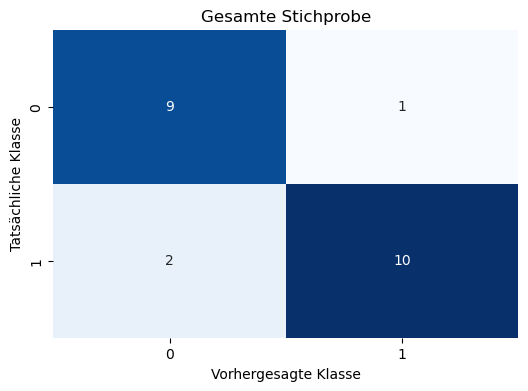

In [7]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from collections import defaultdict
from IPython.display import display, HTML
optuna.logging.set_verbosity(optuna.logging.WARNING)

def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    dummy_var = X["Geschlecht_weiblich"]
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    X_scaled["Geschlecht_weiblich"] = dummy_var  
    return X_scaled


def optimize_hyperparameters_and_features(X, y):
    def objective(trial):
        # Optimiere C mit L1-Regularisierung
        C = trial.suggest_float("C", 0.0001, 10.0, log=True)
        model = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=500)

        # RFECV zur gleichzeitigen Feature-Selektion mit 5-facher Cross-Validation
        selector = RFECV(model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
        selector.fit(X, y)

        # Mittlerer ROC-AUC Score
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc", n_jobs=-1))

        return score  # Optuna maximiert diesen Wert

    # Optuna-Studie mit Hyperparameter- und Feature-Optimierung
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20, n_jobs=-1)

    # Beste Parameter und Features extrahieren
    best_params = {"C": study.best_params["C"], "penalty": "l1", "solver": "liblinear"}
    best_model = LogisticRegression(**best_params, max_iter=500)
    best_selector = RFECV(best_model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
    best_selector.fit(X, y)

    return best_params, X.iloc[:, best_selector.support_], sum(best_selector.support_)



def nested_cross_validation(X, y):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    metrics = defaultdict(list)
    confusion_matrices = []

    for train_idx, test_idx in outer_cv.split(X, y):
        # Split into train and test data for the outer fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Gemeinsame Hyperparameter-Optimierung & Feature-Selektion
        best_params, X_train_selected, _ = optimize_hyperparameters_and_features(X_train, y_train)

        # Gleiche Features für Testdaten verwenden
        X_test_selected = X_test[X_train_selected.columns]

        # Trainiere Modell mit optimierten Parametern und Features
        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train_selected, y_train)

        # Predictions
        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)
        y_test_prob = model.predict_proba(X_test_selected)[:, 1]

        # Metriken speichern
        metrics["train_accuracy_0"].append(accuracy_score(y_train[y_train == 0], y_train_pred[y_train == 0]))
        metrics["train_accuracy_1"].append(accuracy_score(y_train[y_train == 1], y_train_pred[y_train == 1]))
        metrics["test_accuracy_0"].append(accuracy_score(y_test[y_test == 0], y_test_pred[y_test == 0]))
        metrics["test_accuracy_1"].append(accuracy_score(y_test[y_test == 1], y_test_pred[y_test == 1]))
        metrics["f1_score_0"].append(f1_score(y_test, y_test_pred, pos_label=0))
        metrics["f1_score_1"].append(f1_score(y_test, y_test_pred, pos_label=1))
        metrics["recall_0"].append(recall_score(y_test, y_test_pred, pos_label=0))
        metrics["recall_1"].append(recall_score(y_test, y_test_pred, pos_label=1))
        metrics["roc_auc_0"].append(roc_auc_score(y_test, y_test_pred))
        metrics["roc_auc_1"].append(roc_auc_score(y_test, y_test_prob))

        confusion_matrices.append(confusion_matrix(y_test, y_test_pred))

    # Durchschnittliche Metriken und Konfusionsmatrix berechnen
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}
    avg_cm = np.mean(confusion_matrices, axis=0)

    return avg_metrics, avg_cm

    
def print_metrics(avg_metrics):
    # Erstellen eines DataFrames mit den gewünschten Werten
    df = pd.DataFrame({
        "Gruppe": ["0 (Unverletzte)", "1 (Verletzte)"],
        "Train Accuracy": [f"{avg_metrics['train_accuracy_0'][0]*100:.2f} ± {avg_metrics['train_accuracy_0'][1]*100:.2f}",
                           f"{avg_metrics['train_accuracy_1'][0]*100:.2f} ± {avg_metrics['train_accuracy_1'][1]*100:.2f}"],
        "Test Accuracy": [f"{avg_metrics['test_accuracy_0'][0]*100:.2f} ± {avg_metrics['test_accuracy_0'][1]*100:.2f}",
                          f"{avg_metrics['test_accuracy_1'][0]*100:.2f} ± {avg_metrics['test_accuracy_1'][1]*100:.2f}"],
        "F1 Score": [f"{avg_metrics['f1_score_0'][0]*100:.2f} ± {avg_metrics['f1_score_0'][1]*100:.2f}",
                     f"{avg_metrics['f1_score_1'][0]*100:.2f} ± {avg_metrics['f1_score_1'][1]*100:.2f}"],
        "Recall": [f"{avg_metrics['recall_0'][0]*100:.2f} ± {avg_metrics['recall_0'][1]*100:.2f}",
                   f"{avg_metrics['recall_1'][0]*100:.2f} ± {avg_metrics['recall_1'][1]*100:.2f}"],
        "ROC-AUC": [f"{avg_metrics['roc_auc_0'][0]*100:.2f} ± {avg_metrics['roc_auc_0'][1]*100:.2f}",
                    f"{avg_metrics['roc_auc_1'][0]*100:.2f} ± {avg_metrics['roc_auc_1'][1]*100:.2f}"]
    })

    styled_df = df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"),  # Heller Hintergrund
                                                   ("color", "black")]}]) \
                    .set_caption("Evaluierungsmetriken")

    display(styled_df)

def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.title(title)
    plt.show()

def main():
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML.xlsx"
    
    # Load and preprocess data
    X, y = load_data(file_path)
    X = preprocess_data(X)

    # Perform nested cross-validation
    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm = nested_cross_validation(X, y)
    
    # Print results and plot confusion matrix
    print("\n--- Endgültige Ergebnisse ---")
    print_metrics(avg_metrics)
    plot_confusion_matrix(avg_cm, title="Gesamte Stichprobe")

if __name__ == "__main__":
    main()


Durchführen der äußeren Cross-Validation...

--- Häufigste Features ---


,Feature,Häufigkeit
0,CMJ_maxRFD,15
1,UNINV_CMJ_uni_Av. propulsive force,14
2,INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW],14
3,UNINV_CMJ_uni_Braking Duration-Mittelwert [s],13
4,ISO_Drehmoment_Seitenunterschied Extension relativ,13
5,INV_Arbeit_Flexion,12
6,INV_Arbeit_Extension,9
7,CMJ_Vertical Stiffness,6
8,UNINV_CMJ_uni_Rel. Peak Power,5
9,UNINV_Arbeit_Extension,4



--- Endgültige Ergebnisse ---


,Gruppe,Train Accuracy,Test Accuracy,F1 Score,Recall,ROC-AUC
0,0 (Unverletzte),99.52 ± 0.97,92.55 ± 8.95,89.29 ± 8.47,92.55 ± 8.95,89.76 ± 8.83
1,1 (Verletzte),97.55 ± 3.43,86.97 ± 13.05,89.47 ± 9.89,86.97 ± 13.05,97.09 ± 3.58


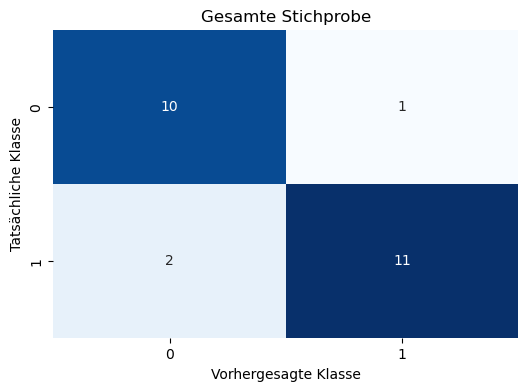


--- Durchschnittlicher Hyperparameter (C) ---
Durchschnittlicher C-Wert über alle Folds: 2.2573


In [15]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from collections import defaultdict, Counter
from IPython.display import display, HTML

optuna.logging.set_verbosity(optuna.logging.WARNING)

def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    dummy_var = X["Geschlecht_weiblich"]
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    X_scaled["Geschlecht_weiblich"] = dummy_var  
    return X_scaled

def optimize_hyperparameters_and_features(X, y):
    def objective(trial):
        # Optimiere C mit L1-Regularisierung
        C = trial.suggest_float("C", 0.0001, 10.0, log=True)
        model = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=500)

        # RFECV zur gleichzeitigen Feature-Selektion mit 5-facher Cross-Validation
        selector = RFECV(model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
        selector.fit(X, y)

        # Mittlerer ROC-AUC Score
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc", n_jobs=-1))

        return score  # Optuna maximiert diesen Wert

    # Optuna-Studie mit Hyperparameter- und Feature-Optimierung
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20, n_jobs=-1)

    # Beste Parameter und Features extrahieren
    best_params = {"C": study.best_params["C"], "penalty": "l1", "solver": "liblinear"}
    best_model = LogisticRegression(**best_params, max_iter=500)
    best_selector = RFECV(best_model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
    best_selector.fit(X, y)

    return best_params, X.iloc[:, best_selector.support_], best_selector

def nested_cross_validation(X, y):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    metrics = defaultdict(list)
    confusion_matrices = []
    feature_importances = []
    best_hyperparameters = []
    selected_features = []

    for train_idx, test_idx in outer_cv.split(X, y):
        # Split into train and test data for the outer fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Gemeinsame Hyperparameter-Optimierung & Feature-Selektion
        best_params, X_train_selected, best_selector = optimize_hyperparameters_and_features(X_train, y_train)

        # Hyperparameter speichern
        best_hyperparameters.append(best_params["C"])

        # Feature-Selektion speichern
        selected_features.append(list(X_train_selected.columns))

        # Gleiche Features für Testdaten verwenden
        X_test_selected = X_test[X_train_selected.columns]

        # Trainiere Modell mit optimierten Parametern und Features
        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train_selected, y_train)

        # Predictions
        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)
        y_test_prob = model.predict_proba(X_test_selected)[:, 1]

        # Metriken speichern
        metrics["train_accuracy_0"].append(accuracy_score(y_train[y_train == 0], y_train_pred[y_train == 0]))
        metrics["train_accuracy_1"].append(accuracy_score(y_train[y_train == 1], y_train_pred[y_train == 1]))
        metrics["test_accuracy_0"].append(accuracy_score(y_test[y_test == 0], y_test_pred[y_test == 0]))
        metrics["test_accuracy_1"].append(accuracy_score(y_test[y_test == 1], y_test_pred[y_test == 1]))
        metrics["f1_score_0"].append(f1_score(y_test, y_test_pred, pos_label=0))
        metrics["f1_score_1"].append(f1_score(y_test, y_test_pred, pos_label=1))
        metrics["recall_0"].append(recall_score(y_test, y_test_pred, pos_label=0))
        metrics["recall_1"].append(recall_score(y_test, y_test_pred, pos_label=1))
        metrics["roc_auc_0"].append(roc_auc_score(y_test, y_test_pred))
        metrics["roc_auc_1"].append(roc_auc_score(y_test, y_test_prob))

        confusion_matrices.append(confusion_matrix(y_test, y_test_pred))

    # Durchschnittliche Metriken und Konfusionsmatrix berechnen
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}
    avg_cm = np.mean(confusion_matrices, axis=0)

    # Durchschnittlicher Hyperparameter (C) berechnen
    avg_C = np.mean(best_hyperparameters)

    # Häufigste Features berechnen
    flat_selected_features = [feature for sublist in selected_features for feature in sublist]
    most_common_features = Counter(flat_selected_features).most_common()

    return avg_metrics, avg_cm, avg_C, most_common_features


def print_metrics(avg_metrics):
    # Erstellen eines DataFrames mit den gewünschten Werten
    df = pd.DataFrame({
        "Gruppe": ["0 (Unverletzte)", "1 (Verletzte)"],
        "Train Accuracy": [f"{avg_metrics['train_accuracy_0'][0]*100:.2f} ± {avg_metrics['train_accuracy_0'][1]*100:.2f}",
                           f"{avg_metrics['train_accuracy_1'][0]*100:.2f} ± {avg_metrics['train_accuracy_1'][1]*100:.2f}"],
        "Test Accuracy": [f"{avg_metrics['test_accuracy_0'][0]*100:.2f} ± {avg_metrics['test_accuracy_0'][1]*100:.2f}",
                          f"{avg_metrics['test_accuracy_1'][0]*100:.2f} ± {avg_metrics['test_accuracy_1'][1]*100:.2f}"],
        "F1 Score": [f"{avg_metrics['f1_score_0'][0]*100:.2f} ± {avg_metrics['f1_score_0'][1]*100:.2f}",
                     f"{avg_metrics['f1_score_1'][0]*100:.2f} ± {avg_metrics['f1_score_1'][1]*100:.2f}"],
        "Recall": [f"{avg_metrics['recall_0'][0]*100:.2f} ± {avg_metrics['recall_0'][1]*100:.2f}",
                   f"{avg_metrics['recall_1'][0]*100:.2f} ± {avg_metrics['recall_1'][1]*100:.2f}"],
        "ROC-AUC": [f"{avg_metrics['roc_auc_0'][0]*100:.2f} ± {avg_metrics['roc_auc_0'][1]*100:.2f}",
                    f"{avg_metrics['roc_auc_1'][0]*100:.2f} ± {avg_metrics['roc_auc_1'][1]*100:.2f}"]
    })

    styled_df = df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"),  # Heller Hintergrund
                                                   ("color", "black")]}]) \
                    .set_caption("Durchschnittliche Evaluierungsmetriken")

    display(styled_df)

def plot_confusion_matrix(cm, title="Gemittelte Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.title(title)
    plt.show()

def print_feature_importance_table(most_common_features):
    # DataFrame erstellen, um die häufigsten Features anzuzeigen
    feature_importance_df = pd.DataFrame(most_common_features, columns=["Feature", "Häufigkeit"])

    # Tabelle mit dem gleichen Design wie bei den Metriken erstellen
    styled_df = feature_importance_df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"), 
                                                   ("color", "black")]}]) \
                    .set_caption("Häufigste Features")

    # Ausgabe der Tabelle
    display(styled_df)


def main():
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML.xlsx"
    
    # Load and preprocess data
    X, y = load_data(file_path)
    X = preprocess_data(X)

    # Perform nested cross-validation
    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm, avg_C, most_common_features = nested_cross_validation(X, y)
    
    # Häufigste Features über alle Folds
    print_feature_importance_table(most_common_features)
    
    # Durchschnittlicher Hyperparameter
    print(f"Durchschnittlicher C-Wert: {avg_C:.4f}")

  
    # Print results and plot confusion matrix
    print_metrics(avg_metrics)
    plot_confusion_matrix(avg_cm, title="Gesamte Stichprobe")

    
if __name__ == "__main__":
    main()
